# Table of Contents

1. [Multi-class Classification](#multi-class)
    1. [Dataset](#dataset)
    2. [Visualizing the data](#visualizing)
    3. [Vectorizing Logistic Regression](#vectorizing)
        1. [Vectorizing the cost function](#vectorizing-cost)
        2. [Vectorizing the gradient](#vectorizing-gradient)
        3. [Vectorizing regularized logistic regression](#vectorizing-logreg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
# Setup the parameters you will use for this part of the exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10

<div id='multi-class'/>

## 1. Multi-class Classification

<div id='dataset'/>

### 1.1 Dataset

In [3]:
# import the data set
import scipy.io

data_directory = '../../../Documents/Machine-Learning/Week 4/01. Data/'
file = 'ex3data1.mat'

mat = scipy.io.loadmat(data_directory+file)

In [4]:
# convert to Pandas data frame

examples = pd.DataFrame(data = mat['X'])
target = pd.DataFrame(data = mat['y'], columns = ['digit'])
df = pd.merge(examples, target, left_index = True, right_index = True)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


<div id='visualizing'/>

### 1.2 Visualizing the data

ValueError: cannot reshape array of size 800 into shape (20,20)

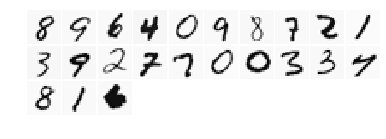

In [6]:
dim = 10

m, n = examples.shape

# generate random sample from the data set to plot
to_plot = examples.loc[np.random.randint(m, size=dim * dim)]

# visualize the numbers
fig = plt.figure(figsize=(5, 5))

gs = gridspec.GridSpec(dim, dim)
gs.update(bottom=0.01, top=0.99, left=0.01, right=0.99, 
          hspace=0.05, wspace=0.05)

indeces = list(to_plot.index.values)

k=0

for i in range(dim):
    for j in range(dim):
        ax = plt.subplot(gs[i, j])
        ax.axis('off')
        ax.imshow(to_plot.loc[indeces[k]].values.reshape(int(np.sqrt(n)), int(np.sqrt(n))).T,
            cmap=plt.get_cmap('Greys'), interpolation = 'nearest')
        k += 1

<div id='vectorizing'/>

### 1.3 Vectorizing Logistic Regression

<div id='vectorizing-cost'/>

#### 1.3.1 Vectorizing the cost function

In [ ]:
# define the sigmiod function

def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return(g)

# define the cost function

def costFunction(theta, x, y):
    m = len(y)
    z = x @ theta
    h = sigmoid(z)
    J = 1/m * sum( -1*y.values.transpose()[0]*np.log(h) - ((1-y.values.transpose()[0])*np.log(1-h)))
    return(J)

In [ ]:
# perform a test to check if the functions work well

theta_t = np.array([-2, -1, 1, 2])
X_t = pd.DataFrame(np.c_[ np.ones((5,1)), np.reshape(np.array([range(1,16)]),(5,3), order = 'F')/10 ])
y_t = pd.DataFrame(np.array([1,0,1,0,1]) >= 0.5)

cost_t = costFunction(theta_t, X_t, y_t)

print('The test cost is {}'.format(cost_t))
print('Expected cost is 0.73482')

<div id='vectorizing-gradient'/>

#### 1.3.2 Vectorizing the gradient

In [ ]:
# define the gradient

def gradient(theta, x, y):
    m = len(y)
    z = x @ theta
    h = sigmoid(z)
    beta = h-y[0].values
    grad = 1/m * np.array(np.transpose(x) @ beta)
    return(grad)

In [ ]:
# perform a test to check if the function works well

gradient_t = gradient(theta_t, X_t, y_t)

print('The values of the gradient are: {}'.format(gradient_t))
print('The expected gradient values are: 0.146561, 0.051442, 0.124722, 0.198003')

<div id='vectorizing-logreg'/>

#### 1.3.3 Vectorizing regularized logistic regression

In [ ]:
def costFunctionReg(theta, x, y, lam):
    m = len(y)
    z = x @ theta
    h = sigmoid(z)
    J = 1/m * sum( -1*y.values.transpose()[0]*np.log(h) - ((1-y.values.transpose()[0])*np.log(1-h))) + lam/(2*m)* (theta_t[1:] @ theta_t[1:])
    return(J)

def gradientReg(theta, x, y, lam):
    m = len(y)
    z = x @ theta
    h = sigmoid(z)
    beta = h-y[0].values
    grad = 1/m * np.array(np.transpose(x) @ beta) + np.append(0, lam/m * theta[1:])
    return(grad)

In [ ]:
# perform some test to check the implementation

theta_t = np.array([-2, -1, 1, 2])
X_t = pd.DataFrame(np.c_[ np.ones((5,1)), np.reshape(np.array([range(1,16)]),(5,3), order = 'F')/10 ])
y_t = pd.DataFrame(np.array([1,0,1,0,1]) >= 0.5)
lambda_t = 3

cost_t = costFunctionReg(theta_t, X_t, y_t, lambda_t)

print("The test cost is: {}".format(cost_t))
print("The expected cost is: 2.534819")

In [ ]:
# test the gradient values

grad_t = gradientReg(theta_t, X_t, y_t, lambda_t)

print("Gradients: {}".format(grad_t))
print("Expected gradients: 0.146561, -0.548558, 0.724722, 1.398003")